In [1]:
nw = pd.read_pickle('../data/niwot_new.pcl')
stats = pd.read_pickle('../data/niwot_stats.pcl')

In [2]:
nw2 = pd.DataFrame({'min_SWE':nw.groupby(by='dowy').SWE.min(),
                   'max_SWE':nw.groupby(by='dowy').SWE.max(),
                   'mean_SWE':nw.groupby(by='dowy').SWE.mean()})

In [4]:
stats.tail()

,averageMR,peakSWE,DatepeakSWE,DateNS,accumSeasDate,P,DOWYpeakSWE,DOWYnoSnow,DOAS
2010.0,9.74468,0.318,2010-04-08 00:00:00,2010-06-02 00:00:00,2009-10-06 00:00:00,748,190,245,6
2011.0,11.7308,0.432,2011-05-22 00:00:00,2011-06-13 00:00:00,2010-10-13 00:00:00,930,234,256,13
2012.0,7.1875,0.279,2012-03-04 00:00:00,2012-05-16 00:00:00,2011-10-09 00:00:00,747,156,229,9
2013.0,11.1818,0.424,2013-05-11 00:00:00,2013-06-06 00:00:00,2012-10-25 00:00:00,973,223,249,25
2014.0,14.225,0.47,2014-04-09 00:00:00,2014-06-05 00:00:00,2013-10-05 00:00:00,818,191,248,5


In [18]:
nw2.loc[nw2.index>275] = np.NaN

In [4]:
swemaxX = [0,nw2.max_SWE.idxmax(),nw2.max_SWE.idxmin()]
swemaxY = [0,nw2.max_SWE.max(),0]
sweminX = [0,nw2.min_SWE.idxmax(),nw2.loc[nw2.index>100].min_SWE.idxmin()]
sweminY = [0,nw2.min_SWE.max(),0]
swemeanX = [0,nw2.mean_SWE.idxmax(),nw2.mean_SWE.idxmin()]
swemeanY = [0,nw2.mean_SWE.max(),0]

x = np.arange(0,275)
ymax = []
ymin = []

maxaccumslp = (swemaxY[1] - swemaxY[0]) / (swemaxX[1]-swemaxX[0])
maxsmeltslp = (swemaxY[2] - swemaxY[1]) / (swemaxX[2]-swemaxX[1])
minaccumslp = (sweminY[1] - sweminY[0]) / (sweminX[1]-sweminX[0])
minsmeltslp = (sweminY[2] - sweminY[1]) / (sweminX[2]-sweminX[1])

for i in x:
    if i <swemaxX[1]:
        ymax.append(0+(i*maxaccumslp))
    if i >swemaxX[1]:
        ymax.append(swemaxY[1]+((i-swemaxX[1])*maxsmeltslp))
    if i == swemaxX[1]:
        ymax.append(swemaxY[1])
        
    if i <sweminX[1]:
        ymin.append(0+(i*minaccumslp))
    if i >sweminX[1]:
        ymin.append(sweminY[1]+((i-sweminX[1])*minsmeltslp))
    if i == sweminX[1]:
        ymin.append(sweminY[1])
        
ymin = np.array(ymin)
ymax = np.array(ymax)

ymin[ymin<0] = 0
ymax[ymax<0] = 0

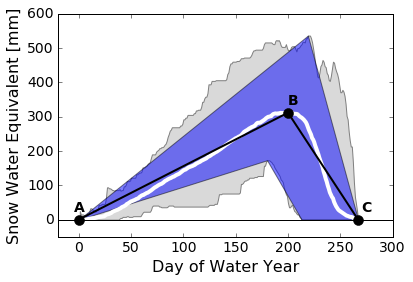

In [5]:
plt.fill_between(nw2.index,nw2.min_SWE,nw2.max_SWE,facecolor='0.85',edgecolor='0.5')
#for wy in nw.wateryear.unique():
#    plt.plot(nw.loc[nw.wateryear==wy].dowy,nw.loc[nw.wateryear==wy].SWE,c='0.7')

plt.fill_between(x,ymax,ymin,alpha=0.5)
#plt.plot(sweminX,sweminY)
plt.plot(nw2.index,nw2.mean_SWE,lw=4,c='w')
plt.plot(swemeanX,swemeanY,c='k',marker='o',ms=10,lw=2)
plt.axhline(0,c='k')

plt.xlim(-20,300)
plt.ylim(-50,600)

plt.text(-5,25,'A',fontsize=14,fontweight='bold')
plt.text(200,335,'B',fontsize=14,fontweight='bold')
plt.text(270,25,'C',fontsize=14,fontweight='bold')

ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];

plt.xlabel('Day of Water Year', fontsize = 16)
plt.ylabel('Snow Water Equivalent [mm]', fontsize = 16)

#plt.savefig('./figures/example_niveograh.png',dpi=300,bbox_inches='tight')
#plt.savefig('./figures/example_niveograh.pdf',bbox_inches='tight')

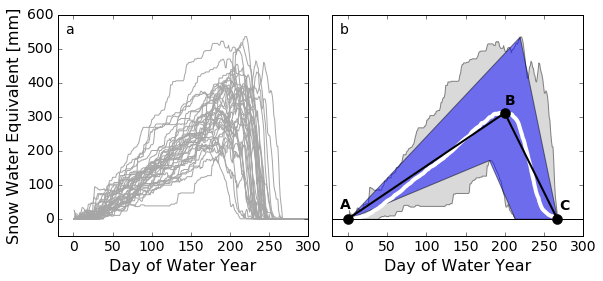

In [33]:
fig = plt.figure(figsize=(8.5,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.sca(ax1)

for wy in nw.wateryear.unique():
    plt.plot(nw.loc[nw.wateryear==wy].dowy,nw.loc[nw.wateryear==wy].SWE,c='0.65')

plt.xlim(-20,300)
plt.ylim(-50,600)

plt.ylabel('Snow Water Equivalent [mm]', fontsize = 16)

[tick.label.set_fontsize(14) for tick in ax1.yaxis.get_major_ticks()];

plt.sca(ax2)
plt.fill_between(nw2.index,nw2.min_SWE,nw2.max_SWE,facecolor='0.85',edgecolor='0.5')

plt.fill_between(x,ymax,ymin,alpha=0.5)
#plt.plot(sweminX,sweminY)
plt.plot(nw2.index,nw2.mean_SWE,lw=4,c='w')
plt.plot(swemeanX,swemeanY,c='k',marker='o',ms=10,lw=2)
plt.axhline(0,c='k')

plt.xlim(-20,300)
plt.ylim(-50,600)

plt.text(-10,30,'A',fontsize=14,fontweight='bold')
plt.text(200,335,'B',fontsize=14,fontweight='bold')
plt.text(270,25,'C',fontsize=14,fontweight='bold')

[tick.label.set_fontsize(14) for tick in ax1.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax2.xaxis.get_major_ticks()];

ax1.set_xlabel('Day of Water Year', fontsize = 16)
ax2.set_xlabel('Day of Water Year', fontsize = 16)

ax2.set_yticklabels([])

ax1.text(-11,545,'a', fontsize=14,fontweight='medium')
ax2.text(-11,545,'b', fontsize=14,fontweight='medium')
plt.tight_layout()
plt.savefig('./figures/example_niveograh_2panel.png',dpi=300,bbox_inches='tight')
plt.savefig('./figures/example_niveograh_2panel.pdf',bbox_inches='tight')

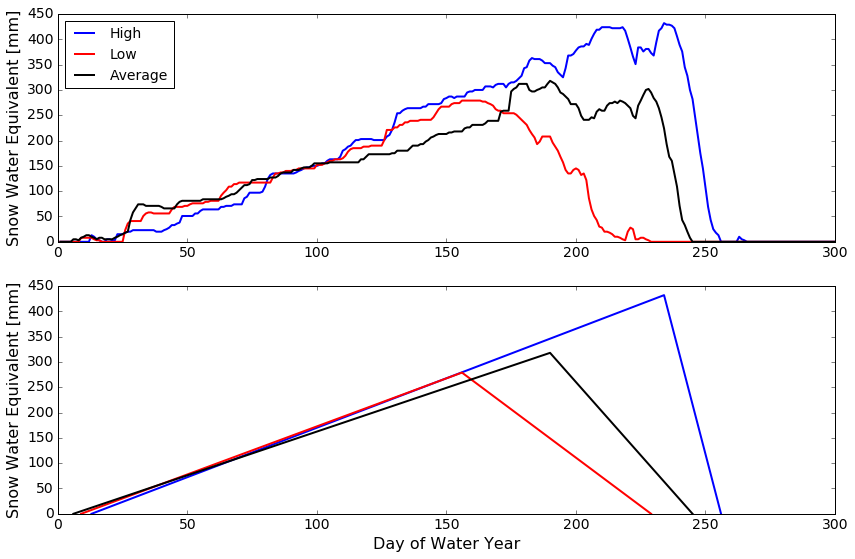

In [63]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

tmp = nw.loc[nw.wateryear==2011]
ax1.plot(tmp.dowy,tmp.SWE,c='b',lw=2,label = 'High')
tmp = nw.loc[nw.wateryear==2012]
ax1.plot(tmp.dowy,tmp.SWE,c='r',lw=2,label = 'Low')
tmp = nw.loc[nw.wateryear==2010]
ax1.plot(tmp.dowy,tmp.SWE,c='k',lw=2,label = 'Average')
ax1.legend(loc='upper left', fontsize = 14)
ax1.set_xlim(0,300)
ax1.set_xlabel('',)
ax1.set_ylabel('Snow Water Equivalent [mm]', fontsize = 16)

[tick.label.set_fontsize(14) for tick in ax1.yaxis.get_major_ticks()];

tmp = stats.loc[stats.index==2011]
x = [tmp.DOAS.as_matrix()[0],tmp.DOWYpeakSWE.as_matrix()[0],tmp.DOWYnoSnow.as_matrix()[0]]
y = [0,tmp.peakSWE.as_matrix()[0]*1000,0]
ax2.plot(x,y,c='b',lw=2)
tmp = stats.loc[stats.index==2012]
x = [tmp.DOAS.as_matrix()[0],tmp.DOWYpeakSWE.as_matrix()[0],tmp.DOWYnoSnow.as_matrix()[0]]
y = [0,tmp.peakSWE.as_matrix()[0]*1000,0]
ax2.plot(x,y,c='r',lw=2)
tmp = stats.loc[stats.index==2010]
x = [tmp.DOAS.as_matrix()[0],tmp.DOWYpeakSWE.as_matrix()[0],tmp.DOWYnoSnow.as_matrix()[0]]
y = [0,tmp.peakSWE.as_matrix()[0]*1000,0]
ax2.plot(x,y,c='k',lw=2)
[tick.label.set_fontsize(14) for tick in ax1.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax2.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax2.yaxis.get_major_ticks()];
ax2.set_xlabel('Day of Water Year', fontsize = 16)
ax2.set_ylabel('Snow Water Equivalent [mm]', fontsize = 16)
plt.tight_layout()
plt.savefig('./figures/sample_niveographs_diss_def.png',bbox_inches='tight',dpi=300)